<a href="https://colab.research.google.com/github/pranitha-pedapudi/IIIT_FMML/blob/main/FMML_M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [13]:
# Load the Wine dataset
dataset = datasets.load_wine()
# Dataset description
print(dataset.DESCR)

print("Original target values:", dataset.target)

# No need for target conversion here as Wine dataset already contains integers as targets
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [14]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels, and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm
    """
    diff = traindata - query  # find the difference between features
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]  # find the label of the nearest neighbor
    return label

In [15]:
def NN(traindata, trainlabel, testdata):
    """
    Predicts the labels for the test data using the nearest neighbour algorithm
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [16]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    Randomly predicts labels for the test data
    """
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [17]:
def Accuracy(gtlabel, predlabel):
    """
    Calculates the accuracy of the classifier
    """
    assert len(gtlabel) == len(predlabel), "Length of ground-truth labels and predicted labels must match"
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

In [18]:
def split(data, label, percent):
    """
    Splits the dataset into training and test sets based on the given percentage
    """
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [19]:
# Splitting the data into 80% training and 20% test
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20 / 100)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

# Further split the training data into training and validation sets (75% train, 25% validation)
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75 / 100)

Number of test samples: 38
Number of train samples: 140
Percent of test data: 21.348314606741575 %


In [20]:
# Nearest Neighbor classifier on training data
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy * 100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %


In [22]:
# Nearest Neighbor classifier on validation data
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy * 100, "%")

Validation accuracy using nearest neighbour algorithm: 71.42857142857143 %


In [24]:
# Test accuracy using nearest neighbor
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy using nearest neighbour algorithm:", testAccuracy * 100, "%")

Test accuracy using nearest neighbour algorithm: 71.05263157894737 %


In [25]:
# Average Accuracy over multiple iterations
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations


In [26]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc * 100, "%")

testpred = NN(alltraindata, alltrainlabel, testdata)
print("Test accuracy using nearest neighbour algorithm:", Accuracy(testlabel, testpred) * 100, "%")

Average validation accuracy: 73.2090421355993 %
Test accuracy using nearest neighbour algorithm: 71.05263157894737 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

  A: Increasing the validation set size reduces the amount of data for training, potentially decreasing validation accuracy as the model has less data to learn from. For Nearest Neighbour, the model needs more data to work effectively, so increasing the validation set size too much may hurt validation performance.

2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

  A: Reducing the validation set gives more data for training, often improving training accuracy, but may lead to overfitting. A too-small validation set may not represent the test set well, leading to unreliable performance estimates.
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

  A: Reducing the validation set gives more data for training, often improving training accuracy, but may lead to overfitting. A too-small validation set may not represent the test set well, leading to unreliable performance estimates.

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

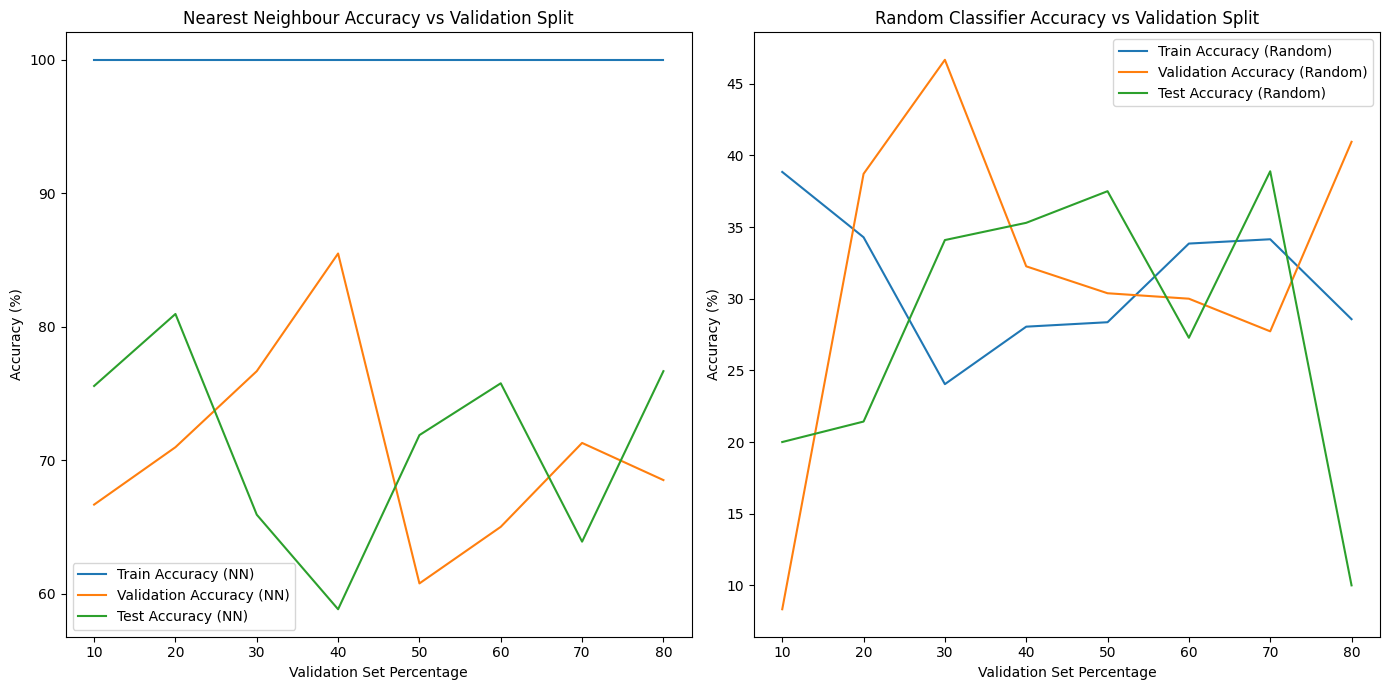

In [29]:
validation_percentages = np.arange(0.1, 0.9, 0.1)

train_acc_nn = []
val_acc_nn = []
test_acc_nn = []
train_acc_random = []
val_acc_random = []
test_acc_random = []


for val_percent in validation_percentages:

    testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20 / 100)


    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 1 - val_percent)


    trainpred_nn = NN(traindata, trainlabel, traindata)
    train_acc_nn.append(Accuracy(trainlabel, trainpred_nn) * 100)
    valpred_nn = NN(traindata, trainlabel, valdata)
    val_acc_nn.append(Accuracy(vallabel, valpred_nn) * 100)
    testpred_nn = NN(traindata, trainlabel, testdata)
    test_acc_nn.append(Accuracy(testlabel, testpred_nn) * 100)


    trainpred_random = RandomClassifier(traindata, trainlabel, traindata)
    train_acc_random.append(Accuracy(trainlabel, trainpred_random) * 100)
    valpred_random = RandomClassifier(traindata, trainlabel, valdata)
    val_acc_random.append(Accuracy(vallabel, valpred_random) * 100)
    testpred_random = RandomClassifier(traindata, trainlabel, testdata)
    test_acc_random.append(Accuracy(testlabel, testpred_random) * 100)


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.plot(validation_percentages * 100, train_acc_nn, label='Train Accuracy (NN)')
plt.plot(validation_percentages * 100, val_acc_nn, label='Validation Accuracy (NN)')
plt.plot(validation_percentages * 100, test_acc_nn, label='Test Accuracy (NN)')
plt.title('Nearest Neighbour Accuracy vs Validation Split')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy (%)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(validation_percentages * 100, train_acc_random, label='Train Accuracy (Random)')
plt.plot(validation_percentages * 100, val_acc_random, label='Validation Accuracy (Random)')
plt.plot(validation_percentages * 100, test_acc_random, label='Test Accuracy (Random)')
plt.title('Random Classifier Accuracy vs Validation Split')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets


dataset = datasets.load_iris()
X = dataset.data
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)


knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)


y_pred_1 = knn_1.predict(X_test)
y_pred_3 = knn_3.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_3 = accuracy_score(y_test, y_pred_3)


print(f"1-Nearest Neighbour Accuracy: {accuracy_1 * 100:.2f}%")
print(f"3-Nearest Neighbour Accuracy: {accuracy_3 * 100:.2f}%")


1-Nearest Neighbour Accuracy: 100.00%
3-Nearest Neighbour Accuracy: 100.00%


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?

  A: Yes, averaging the validation accuracy over multiple splits tends to produce more consistent results. When you evaluate on a single validation split, the result can be highly dependent on the specific data points included in that split, which may not represent the entire dataset well.

  By averaging over several splits, you reduce the variability due to the specific split, leading to a more reliable estimate of validation accuracy. This method is called cross-validation, where you repeatedly train and evaluate the model on different subsets of the data, and the final result is an average across these subsets.  
2. Does it give more accurate estimate of test accuracy?

  A: Yes, averaging validation accuracy across multiple splits can give a more accurate estimate of test accuracy, but it’s not a guarantee. Here’s why:

  Averaging helps to reduce noise and overfitting to a particular validation split, which tends to provide a closer estimate of the generalization performance on unseen data (the test set).
However, validation accuracy is still only an estimate of the test accuracy, and the actual test accuracy can differ, especially if the test set contains data distributions not seen in the validation or training sets.
In practical machine learning, cross-validation (e.g., 5-fold or 10-fold) is often used as a proxy to estimate test accuracy when a test set is not available, and it generally provides better estimates than a single train-validation split.
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

  A: Higher Iterations = More Stability: With a higher number of iterations (splits), the estimate becomes more stable, as averaging over more splits reduces the effect of randomness in the data selection.
Diminishing Returns: After a certain point, increasing the number of iterations offers diminishing returns. For example, if you increase iterations from 10 to 100, the estimate may become slightly more stable, but the improvement in stability won’t be as significant as increasing from 1 to 10.
For practical purposes, using 10-20 iterations is often enough to get a reliable estimate without wasting too much computational time.
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

  A: Yes, to some extent.

  Very Small Training Set: If the training set is small, increasing the number of iterations won’t make up for the lack of data. The model needs a certain amount of training data to learn effectively. However, increasing iterations can give more reliable performance estimates by making the most of the small data available.

  In cases with very limited data, techniques like data augmentation (for images) or transfer learning can help compensate for the small training set rather than relying solely on more iterations.

  Very Small Validation Set: If the validation set is small, increasing iterations can improve the accuracy estimate. Each iteration gives a new validation set, and averaging across many iterations smooths out any anomalies caused by a small or unrepresentative validation set. This is especially useful in cases where the total dataset is large, but you want to reserve as much data as possible for training.

  


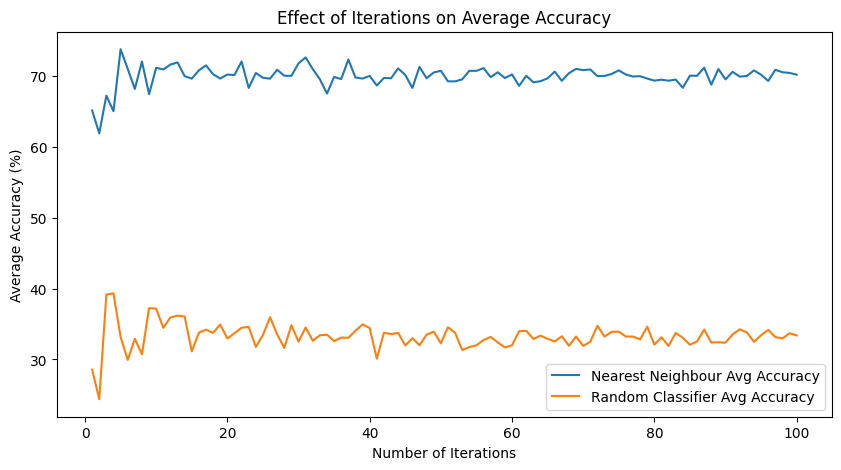

In [31]:
iterations = np.arange(1, 101)
avg_acc_nn = []
avg_acc_random = []


for i in iterations:
    avg_acc_nn.append(AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, i, classifier=NN) * 100)
    avg_acc_random.append(AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, i, classifier=RandomClassifier) * 100)

plt.figure(figsize=(10, 5))
plt.plot(iterations, avg_acc_nn, label='Nearest Neighbour Avg Accuracy')
plt.plot(iterations, avg_acc_random, label='Random Classifier Avg Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Average Accuracy (%)')
plt.title('Effect of Iterations on Average Accuracy')
plt.legend()
plt.show()

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

1. Prepare the Dataset: Load and split the dataset.


2. Experiment with Different Splits: Vary the percentage of the dataset used for training and testing.


3. Train and Evaluate Both Classifiers: For each split size, train and evaluate both 1-NN and 3-NN classifiers.


4. Plot and Compare Results: Visualize how the accuracy changes with the split size.

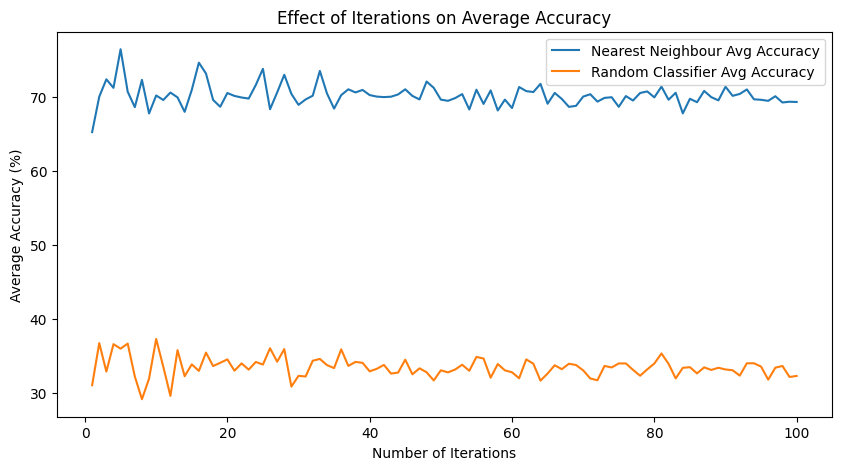

In [33]:
iterations = np.arange(1, 101)
avg_acc_nn = []
avg_acc_random = []


for i in iterations:
    avg_acc_nn.append(AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, i, classifier=NN) * 100)
    avg_acc_random.append(AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, i, classifier=RandomClassifier) * 100)

plt.figure(figsize=(10, 5))
plt.plot(iterations, avg_acc_nn, label='Nearest Neighbour Avg Accuracy')
plt.plot(iterations, avg_acc_random, label='Random Classifier Avg Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Average Accuracy (%)')
plt.title('Effect of Iterations on Average Accuracy')
plt.legend()
plt.show()